In [79]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
# Importing the dataset
datas = pd.read_csv('data.csv')
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700
6,7,101,1.2700
7,8,102,2.2700
8,9,103,3.2700
9,10,104,4.2700


In [81]:
#Dividing the dataset into 2 components

X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values

datas.iloc[:, 1:2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temperature  20 non-null     int64
dtypes: int64(1)
memory usage: 288.0 bytes


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [83]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X_train, y_train) 

LinearRegression()

In [84]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)



LinearRegression()

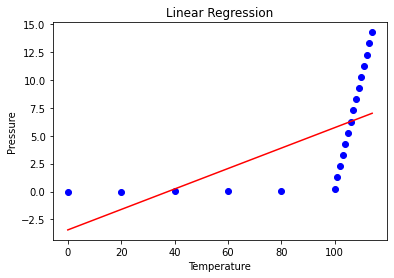

In [85]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')

plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()



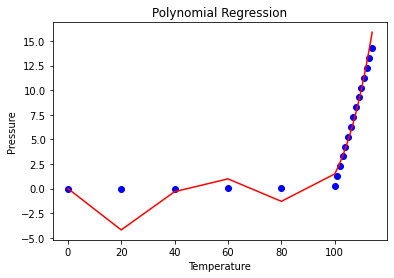

In [86]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')

plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()



In [87]:
# Predicting a new result with Linear Regression after converting predict variable to 2D array
 
y_pred = lin.predict(X_test) #Making Predictions
y_pred

array([ 6.91993021, -1.60358126,  7.01158087,  6.0034236 ])

In [88]:
# Predicting a new result with Polynomial Regression after converting predict variable to 2D array
pred2 = 110.0
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))
 


array([10.14101724])

In [89]:
detection_model = PolynomialFeatures(4)
detect_linear = LinearRegression() 


#Fitting the data in different models
detect_linear.fit(detection_model.fit_transform(X),y)
 
from sklearn.metrics import mean_squared_error
#Predicting test values and printing out Mean Squared Error
detection_preds = detect_linear.predict(detection_model.fit_transform(X))
print('The Error of our Detection Model is: ',mean_squared_error(y,detection_preds))

The Error of our Detection Model is:  0.5650104255916291


In [90]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detect_linear.score(detection_model.fit_transform(X),y)))
  

The accuracy score of our Detection Model is:  0.9763007583441076


In [93]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,13.2700,6.919930
1,0.0012,-1.603581
2,14.2700,7.011581
3,3.2700,6.003424


In [95]:
from sklearn.metrics import mean_squared_error
print('The Error of our Model is: ',mean_squared_error(y_test,y_pred))

The Error of our Model is:  25.763740533650672
